# Kirkland Fig. 3.14

In [8]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf

import numpy as np
from ase import Atoms
import matplotlib.pyplot as plt

from tensorwaves.waves import ProbeWaves
from tensorwaves.potentials import Potential

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


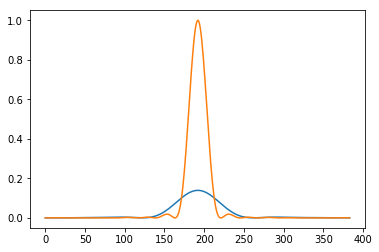

In [9]:
uncorrected = ProbeWaves(extent=16, gpts=512, energy=100e3, aperture_radius=0.0103)
uncorrected.positions = (8,8)
uncorrected.aberrations.parametrization.defocus = 674
uncorrected.aberrations.parametrization.Cs = -1.3e7

corrected = ProbeWaves(extent=16, gpts=512, energy=100e3, aperture_radius=0.025)
corrected.positions = (8,8)

uncorrected_image = np.abs(uncorrected.get_tensor().numpy())**2
uncorrected_image /= np.sum(uncorrected_image)

corrected_image = np.abs(corrected.get_tensor().numpy())**2
corrected_image /= np.sum(corrected_image)

normalization = np.max(corrected_image)

corrected_image /= normalization
uncorrected_image /= normalization

plt.plot(uncorrected_image[0,256,64:-64], label='uncorrected')
plt.plot(corrected_image[0,256,64:-64], label='corrected')